In [2]:
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039295 sha256=0ee5a99c9d19219345a1ac9922fd3e49ff87447a4a59e7636b68ab9c7410ae28
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [3]:
from sklearn.datasets import make_blobs

In [4]:
data, _ =make_blobs(1000)

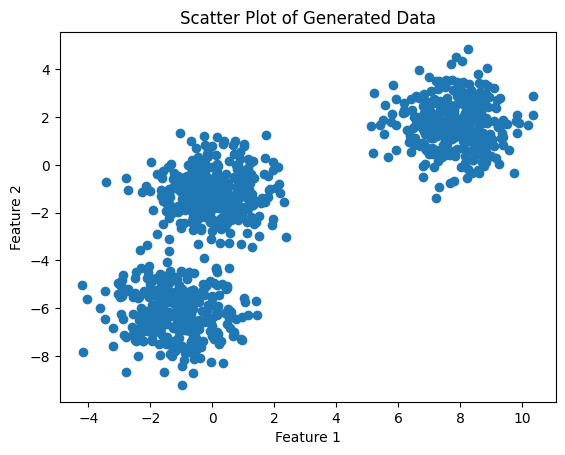

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)

In [12]:
cluster_labels.shape

(1000,)

<function matplotlib.pyplot.show(close=None, block=None)>

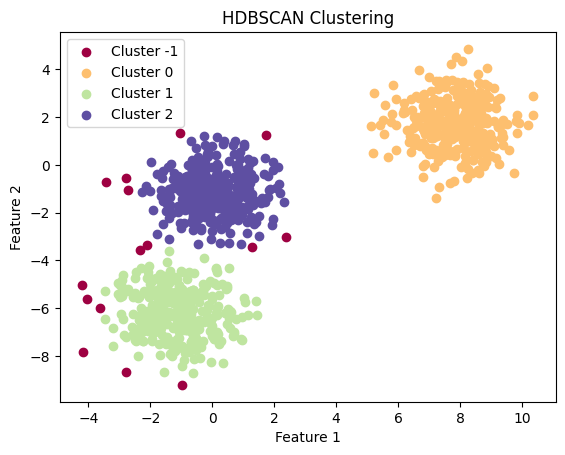

In [14]:
import numpy as np
unique_labels=np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
for label, color in zip(unique_labels, colors):
  cluster_points = data[cluster_labels==label]
  plt.scatter(cluster_points[:,0], cluster_points[:,1], c=[color], label=f'Cluster {label}')
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show


<Axes: ylabel='distance'>

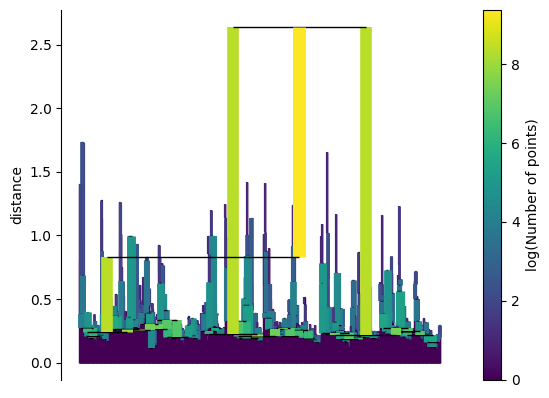

In [15]:
clusterer1 = hdbscan.RobustSingleLinkage(cut=0.125,k=7)
cluster_labels1 = clusterer1.fit_predict(data)
hierarchy = clusterer1.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100,5)
hierarchy.plot()

In [16]:
import os, gc, pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [ ]:
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.datasets import pair_distance
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import sklearn.metrics import adjusted_rand_score, adjusted_rand_score, adjusted_mutual_info_score
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_code()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}


In [17]:
blobs, labels = make_blobs(n_samples=2000, n_features=10, random_state=7)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,3.377363,6.192322,-2.730945,-7.235116,-5.064033,6.908243,-5.148570,-1.108336,7.271061,-8.742103
1,-9.896681,6.359451,-1.186590,4.230620,6.445224,-0.101509,0.182735,-9.194711,-4.383168,0.590212
2,4.988155,6.458413,-2.507201,-7.754367,-3.948151,8.978296,-5.189236,-2.268390,9.753806,-8.549256
3,-8.762798,4.443686,-0.731017,4.173419,10.000869,-0.472272,1.243481,-6.908655,-5.973342,-0.669221
4,4.316755,6.658191,-3.382286,-7.819590,-5.468266,10.217313,-8.050404,-0.598189,7.919504,-9.881978


In [18]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)

HDBSCAN()

In [20]:
clusterer.labels_, clusterer.labels_.max()

(array([0, 2, 0, ..., 2, 2, 2]), 2)

"So we have a total of three clusters, with labels 0, 1, and 2. Importantly HDBSCAN is noise aware -- it has a notion of data samples that are not assigned to any cluster. This is handled by assigning these samples the label -1. The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). You can access these scores via the probabilities_ attribute."


In [21]:
clusterer.probabilities_

array([0.73602772, 0.5905305 , 0.83421251, ..., 0.9410279 , 0.54392911,
       0.84789751])

In [22]:
hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

In [23]:
clusterer = hdbscan.HDBSCAN(metric='manhattan')
clusterer.fit(blobs)
clusterer.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [24]:
!wget https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/clusterable_data.npy?raw=true

--2024-01-22 08:12:16--  https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/clusterable_data.npy?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/scikit-learn-contrib/hdbscan/raw/master/notebooks/clusterable_data.npy [following]
--2024-01-22 08:12:16--  https://github.com/scikit-learn-contrib/hdbscan/raw/master/notebooks/clusterable_data.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy [following]
--2024-01-22 08:12:16--  https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connec

In [25]:
data = np.load('./clusterable_data.npy?raw=true')

In [26]:
data[:10,:]

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       [-0.16453688, -0.22224403],
       [-0.18082392, -0.21107455],
       [-0.03192959, -0.25685872],
       [-0.02634736, -0.26967663],
       [-0.07528465, -0.24028397],
       [-0.14064573, -0.19067136],
       [-0.05783546, -0.23267332]])

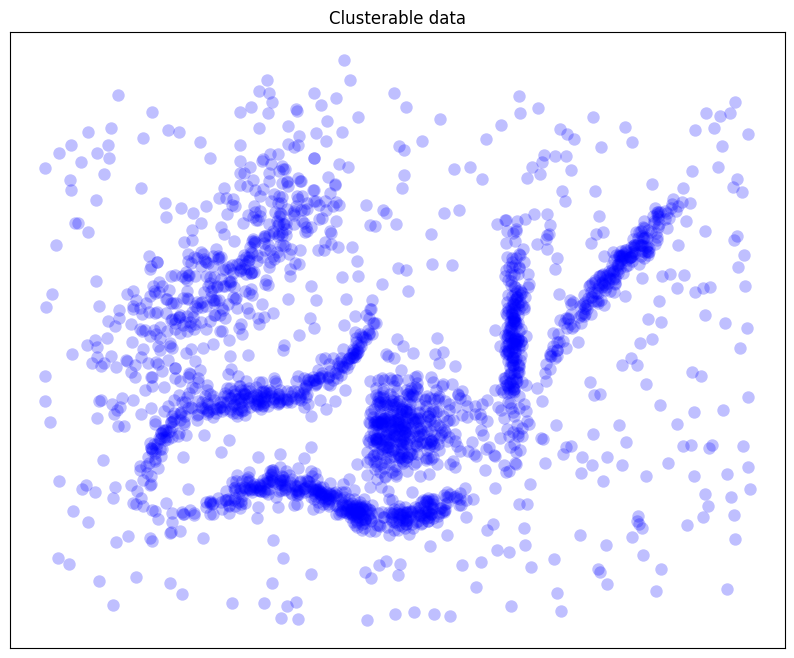

In [30]:
fig=plt.figure(1,figsize=(10,8))
plt.clf()
plt.title("Clusterable data")
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}
plt.scatter(data.T[0],data.T[1],c='b',**plot_kwds)
frame=plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [46]:
import sklearn.cluster as cluster
import os,gc,pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import time
def plot_clusters(data, algorithm, args, kwds):
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time=time.time()
  palette = sns.color_palette('deep', np.unique(labels).max()+1)
  colors= [palette[x] if x>=0 else (0.0, 0.0, 0.0) for x in labels]
  fig = plt.figure(1,figsize=(10,8))
  plt.clf()
  plt.scatter(data.T[0], data.T[1], c=colors , **plot_kwds)
  frame=plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Cluster found by {}'.format(str(algorithm.__name__)),fontsize=16)
  plt.text(-0.5,0.6, 'Clustering took {:.2f}s'.format(end_time-start_time),fontsize=10)

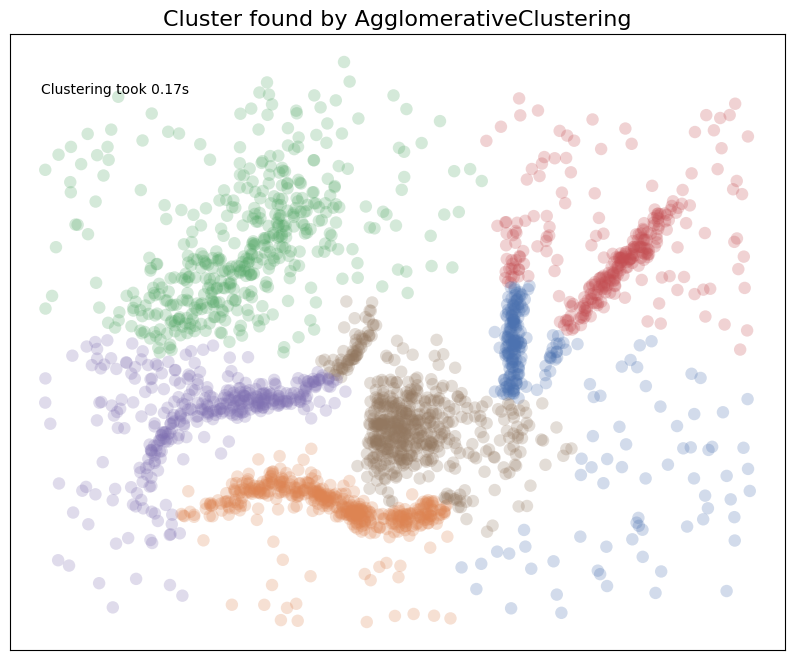

In [47]:
plot_clusters(data, cluster.AgglomerativeClustering,(),{'n_clusters':6,'linkage':'ward'})

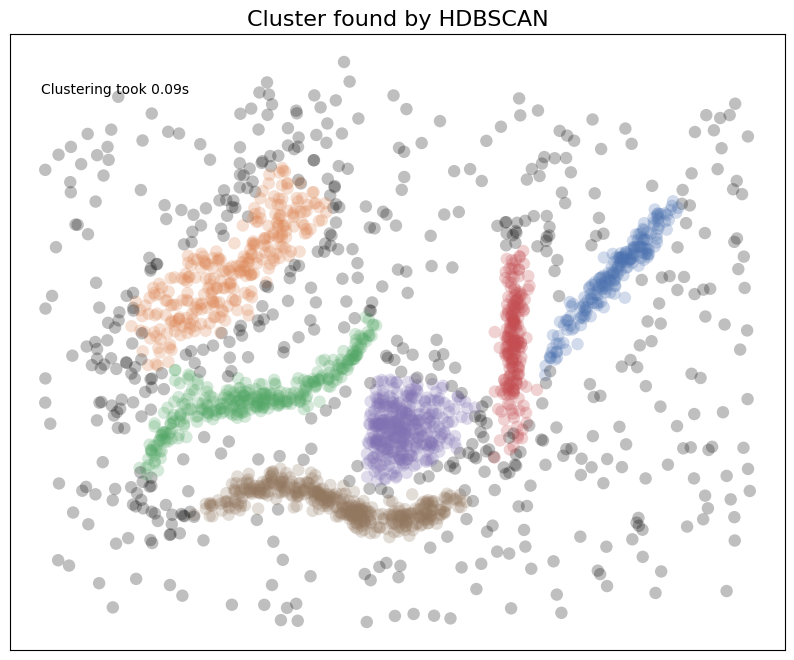

In [49]:
plot_clusters(data, hdbscan.HDBSCAN,(), {'min_cluster_size':15})

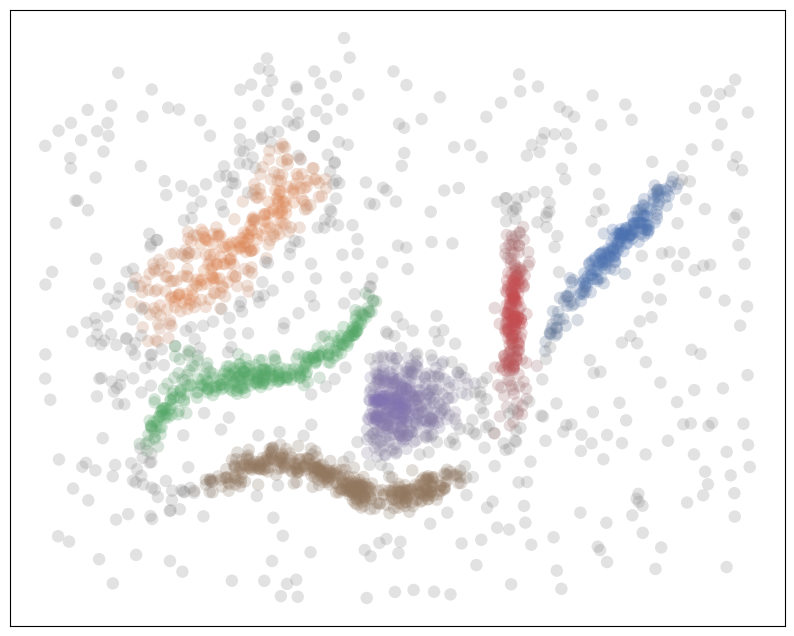

In [50]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(data)
pal=sns.color_palette('deep',8)
colors = [sns.desaturate(pal[col],sat)for col,sat in zip(clusterer.labels_,clusterer.probabilities_)]
fig=plt.figure(1,figsize=(10,8))
plt.clf()
plt.scatter(data.T[0],data.T[1],c=colors,**plot_kwds);
frame=plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [51]:
np.random.seed(1999)
test_points=np.random.random(size=(50,2))-0.5
test_points[:5,:]

array([[ 0.32452017,  0.48462676],
       [ 0.39314452, -0.18035309],
       [ 0.0932567 , -0.30450768],
       [ 0.36021676,  0.36430051],
       [-0.42138215,  0.21691207]])

In [ ]:
colors = [sns.desaturate(pal[col],sat)for col,sat in zip(clusterer.labels_,clusterer.probabilities_)]
fig = plt.figure(1,figsize=(10,8))
plt.clf()
p